In [1]:
#%matplotlib notebook
import tssearch
import numpy as np
import matplotlib.pyplot as plt

### Load query and sequence

In [2]:
dict_ecg = tssearch.load_ecg_example()

tq, query = dict_ecg['tq'], dict_ecg['query']
ts, sequence = dict_ecg['ts'], dict_ecg['sequence']

### Time series visualization

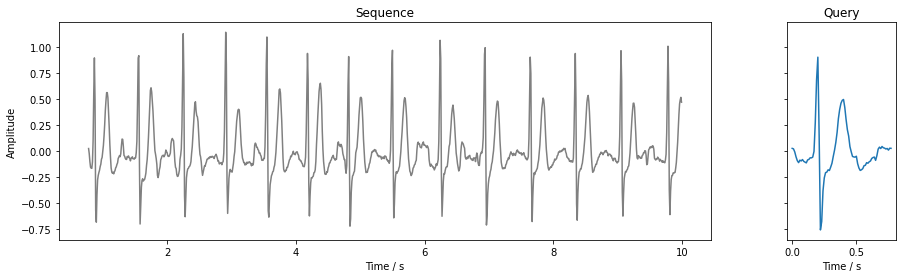

In [3]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [6, 1]}, sharey=True, figsize=(15,4))
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Time / s')
axs[0].set_title('Sequence')
axs[0].plot(ts, sequence, color='gray')
axs[1].set_title('Query')
axs[1].plot(tq, query)
axs[1].set_xlabel('Time / s');

### Define distance configuration file

In [4]:
segment_distance = tssearch.get_distance_dict(["Dynamic Time Warping"])
segment_distance['elastic']['Dynamic Time Warping']['parameters']['alpha'] = 0.5

### Segmentation

In [5]:
segment_results = tssearch.time_series_segmentation(segment_distance, query, sequence, tq, ts)

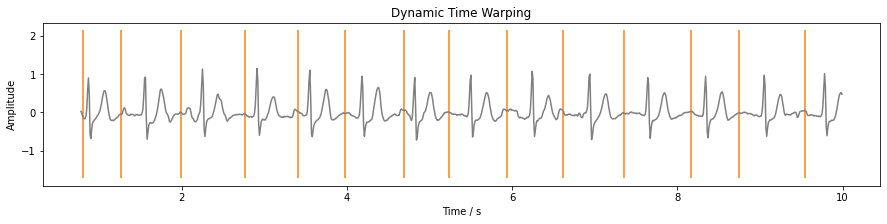

In [6]:
for k in segment_results:
    plt.figure(figsize=(15, 3))
    plt.plot(ts, sequence, color='gray')
    plt.vlines(ts[segment_results[k]], np.min(sequence)-1, np.max(sequence) + 1, 'C1')
    plt.xlabel('Time / s')
    plt.ylabel('Amplitude')
    plt.title(k)

In [7]:
dtw_seg = segment_results['Dynamic Time Warping']
ts_w, windows = [], []
for i in range(len(dtw_seg)-1):
    ts_w += [ts[dtw_seg[i]:dtw_seg[i+1]]]
    windows += [sequence[dtw_seg[i]:dtw_seg[i+1]]]

In [8]:
dict_distances = tssearch.get_distances_by_type()

df = tssearch.time_series_distance_windows(dict_distances, query, windows, tq, ts_w)

In [9]:
df

,Time Warp Edit Distance,Dynamic Time Warping,Longest Common Subsequence,Time Alignment Measurement,Euclidean Distance,Manhattan Distance,Chebyshev Distance
0,12.197400,0.005584,1.000000,0.851897,3.189395,20.564934,1.160025
1,13.742669,0.003717,1.000000,1.388251,3.696310,23.489485,1.005538
2,14.608860,0.008310,0.987013,1.287544,3.232912,19.700154,1.192373
3,14.634213,0.004502,1.000000,1.248747,1.762556,8.876281,0.846170
4,15.265695,0.003020,1.000000,0.942008,2.311031,14.535666,0.645077
5,16.199761,0.005606,1.000000,1.163910,3.118744,15.501122,1.562803
6,16.518660,0.001450,1.000000,0.831984,2.027907,12.838442,0.576380
7,17.254850,0.001318,1.000000,1.145690,3.374647,21.089659,1.049820
8,18.026891,0.004283,1.000000,1.330769,3.255489,20.368605,1.043004
9,18.787646,0.002065,1.000000,1.198830,3.478450,20.907946,1.103401


In [10]:
segment_distance = tssearch.get_distance_dict(["Dynamic Time Warping"])
segment_distance['elastic']['Dynamic Time Warping']['parameters']['alpha'] = 0.5

df = tssearch.time_series_distance_windows(dict_distances, query, sequence, tq, ts, segmentation=segment_distance)

df

,Time Warp Edit Distance,Dynamic Time Warping,Longest Common Subsequence,Time Alignment Measurement,Euclidean Distance,Manhattan Distance,Chebyshev Distance
0,12.197400,0.005584,1.000000,0.851897,3.189395,20.564934,1.160025
1,13.742669,0.003717,1.000000,1.388251,3.696310,23.489485,1.005538
2,14.608860,0.008310,0.987013,1.287544,3.232912,19.700154,1.192373
3,14.634213,0.004502,1.000000,1.248747,1.762556,8.876281,0.846170
4,15.265695,0.003020,1.000000,0.942008,2.311031,14.535666,0.645077
5,16.199761,0.005606,1.000000,1.163910,3.118744,15.501122,1.562803
6,16.518660,0.001450,1.000000,0.831984,2.027907,12.838442,0.576380
7,17.254850,0.001318,1.000000,1.145690,3.374647,21.089659,1.049820
8,18.026891,0.004283,1.000000,1.330769,3.255489,20.368605,1.043004
9,18.787646,0.002065,1.000000,1.198830,3.478450,20.907946,1.103401


In [11]:
import tsfel

cfg = tsfel.get_features_by_domain("temporal")
features = tsfel.time_series_features_extractor(cfg, windows, fs=100)

*** Feature extraction started ***



*** Feature extraction finished ***


In [12]:
features[df.columns] = df

In [13]:
features

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Entropy,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,...,0_Sum absolute diff,0_Total energy,0_Zero crossing rate,Time Warp Edit Distance,Dynamic Time Warping,Longest Common Subsequence,Time Alignment Measurement,Euclidean Distance,Manhattan Distance,Chebyshev Distance
0,4.606136,0.105841,4.606136,0.159149,1.0,0.110434,0.002177,0.048638,0.020945,4.0,...,4.859103,10.468491,4.0,12.197400,0.005584,1.000000,0.851897,3.189395,20.564934,1.160025
1,5.429932,0.130121,5.429932,0.383774,1.0,0.078712,0.000743,0.028494,0.009566,11.0,...,5.667293,7.541572,7.0,13.742669,0.003717,1.000000,1.388251,3.696310,23.489485,1.005538
2,5.142280,0.130246,5.142280,0.321902,1.0,0.076334,-0.000490,0.029270,0.007769,9.0,...,5.801353,6.766158,6.0,14.608860,0.008310,0.987013,1.287544,3.232912,19.700154,1.192373
3,4.627038,0.114566,4.627038,0.213417,1.0,0.080495,0.001044,0.022718,0.002684,12.0,...,5.151679,7.229747,5.0,14.634213,0.004502,1.000000,1.248747,1.762556,8.876281,0.846170
4,5.516740,0.117352,5.516740,0.223634,1.0,0.095793,-0.000301,0.028265,0.014307,8.0,...,5.268632,10.030437,6.0,15.265695,0.003020,1.000000,0.942008,2.311031,14.535666,0.645077
5,5.485347,0.135161,5.485347,0.316167,1.0,0.076604,0.001215,0.025876,0.003496,8.0,...,5.438909,7.725841,5.0,16.199761,0.005606,1.000000,1.163910,3.118744,15.501122,1.562803
6,4.465915,0.106034,4.465915,0.214600,1.0,0.099165,-0.000530,0.044884,0.013727,7.0,...,5.255757,8.426255,6.0,16.518660,0.001450,1.000000,0.831984,2.027907,12.838442,0.576380
7,4.572604,0.120452,4.572604,0.356645,1.0,0.075361,0.000519,0.025794,0.006550,13.0,...,5.275298,6.532291,6.0,17.254850,0.001318,1.000000,1.145690,3.374647,21.089659,1.049820
8,4.484180,0.114659,4.484180,0.350769,1.0,0.081689,0.000489,0.032783,0.005296,11.0,...,5.391444,6.794212,6.0,18.026891,0.004283,1.000000,1.330769,3.255489,20.368605,1.043004
9,4.999987,0.122563,4.999987,0.389770,1.0,0.074018,-0.000702,0.027565,0.010729,13.0,...,5.403350,6.849297,5.0,18.787646,0.002065,1.000000,1.198830,3.478450,20.907946,1.103401
